In [3]:
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.6 MB/s eta 0:00:00


In [5]:
import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt
from skopt.plots import plot_gaussian_process

In [ ]:
noise_level = 0.1

def f(x, noise_level=noise_level):
    output_f = np.sin(5 * x) * (1 - np.tanh(x ** 2)) + np.random.randn() * noise_level
    print("I am inside the function definiton")
    print(output_f)
    return output_f

x = np.linspace(-2, 2, 20).reshape(-1, 1)

f(x, 0)

I am inside the function definiton
[0.00036488]
I am inside the function definiton
[-0.00151764]
I am inside the function definiton
[-0.01355985]
I am inside the function definiton
[-0.02448414]
I am inside the function definiton
[0.06073228]
I am inside the function definiton
[0.28483304]
I am inside the function definiton
[0.2606646]
I am inside the function definiton
[-0.35631273]
I am inside the function definiton
[-0.90057635]
I am inside the function definiton
[-0.49678516]
I am inside the function definiton
[0.49678516]
I am inside the function definiton
[0.90057635]
I am inside the function definiton
[0.35631273]
I am inside the function definiton
[-0.2606646]
I am inside the function definiton
[-0.28483304]
I am inside the function definiton
[-0.06073228]
I am inside the function definiton
[0.02448414]
I am inside the function definiton
[0.01355985]
I am inside the function definiton
[0.00151764]
I am inside the function definiton
[-0.00036488]
<class 'numpy.ndarray'>
<class '

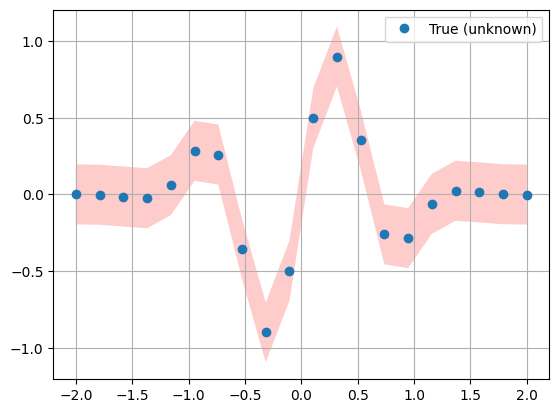

In [23]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 20).reshape(-1, 1) #this is the domain, the x axis
fx = [f(x_i, noise_level=0.0) for x_i in x]

# print("The domain space is:", x)
# print("The values of fx are:", fx)

print(type(x))
print(type(fx))

plt.plot(x, fx, 'o', label="True (unknown)") #plotting fx 

#plotting the confidence bound of fx
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

plt.legend()
plt.grid()
plt.show()

In [25]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

TypeError: ignored

In [ ]:
print(res)

          fun: -0.4767612693013256
            x: [0.9854631255178701]
    func_vals: [ 2.160e-01  1.742e-01 ...  3.766e-02 -3.540e-01]
      x_iters: [[-0.009345334109402526], [1.2713537644662787], [0.4484475787090836], [1.0854396754496047], [1.4426790855107496], [1.0602167228510186], [0.9854631255178701], [0.8963135444832573], [1.9660524141259779], [-1.9994752756909424], [-1.602656017680641], [-1.4033070270480228], [-1.1028885382347218], [-1.769090948958654], [-0.5409710543798749]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                                        n_restarts_optimizer=2, noise=0.010000000000000002,
                                        normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                                        n_restarts_optimizer=2, noise=0.010000000000000002,
                      

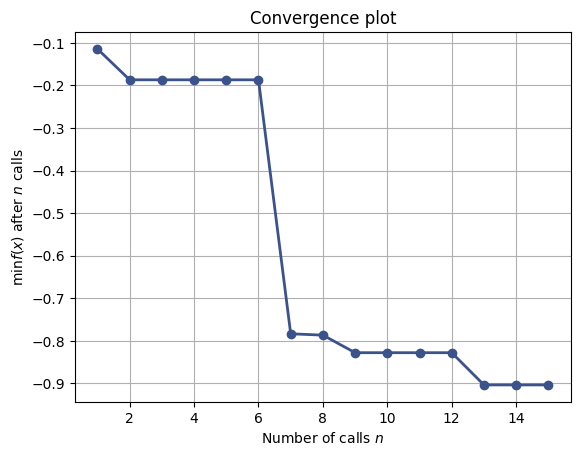

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(res);

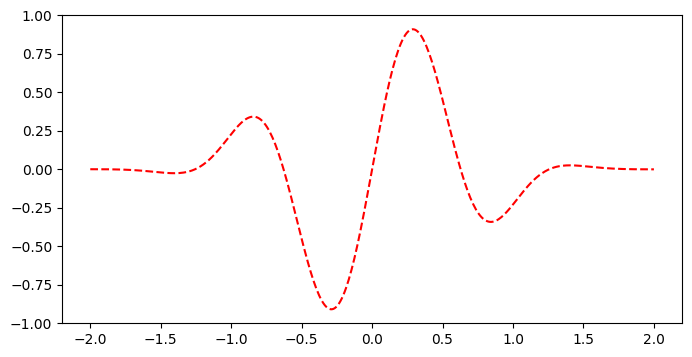

In [ ]:
plt.rcParams["figure.figsize"] = (8, 4)


def f_wo_noise(x):
    return f(x, noise_level=0)

x = np.linspace(-2, 2, 400).reshape(-1, 1) #this is the domain, the x axis
fx_wo_noise = [f_wo_noise(x_i) for x_i in x]

plt.plot(x, fx_wo_noise, "r--", label="True (unknown)") #plotting fx 

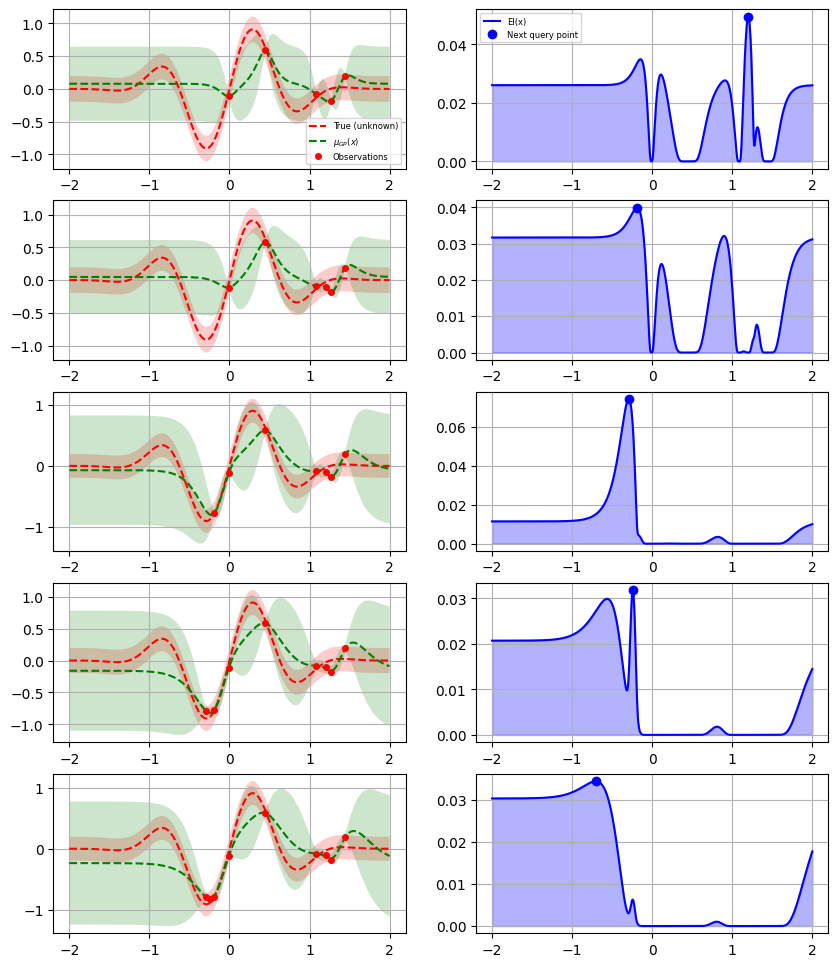

In [ ]:
plt.rcParams["figure.figsize"] = (10, 12)
for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(res, n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")


    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()

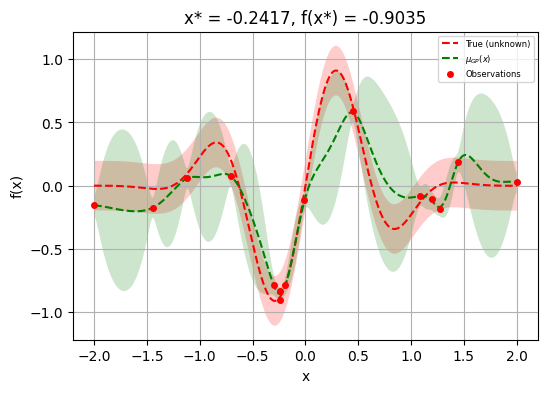

In [ ]:
plt.rcParams["figure.figsize"] = (6, 4)

# Plot f(x) + contours
_ = plot_gaussian_process(res, objective=f_wo_noise,
                          noise_level=noise_level)

plt.show()